In [1]:
%matplotlib inline

import os
import sys

preprocess_path = os.path.abspath(os.path.join('..'))
# print(preprocess_path)
if preprocess_path not in sys.path:
    sys.path.append(preprocess_path)
# sys.path

In [2]:
from preprocess.frequencies import termsFrequency, termPerCompound
from preprocess.load_data import loadDataset
from preprocess.compute_memberships import membershipMatrix
import matplotlib.pyplot as plt
import numpy as np

DATA_LOC = '../data/'
filepath = os.path.join(DATA_LOC, 'dataset.tab')

# Loading the dataset
cids, smiles, names, formulas, terms, treeids, tset = loadDataset(filepath)

Just to visualize some examples in the dataset (only the interesting features):

In [4]:
for i in range(3):
    print(cids[i], smiles[i], '...', terms[i])

18499 CC[N+](C)(C)CC1=CC=CC=C1Br.[Br-] ... ['Anti-Arrhythmia Agents']
3354 CC1=C(OC2=C(C1=O)C=CC=C2C(=O)OCCN3CCCCC3)C4=CC=CC=C4 ... ['Parasympatholytics', 'Urological Agents']
10612083 CC1(C(N2C(S1(=O)=O)CC2=O)C(=O)O)C=CC#N ... ['beta-Lactamase Inhibitors']


The data set was preprocessed in order to keep only one of all the duplicated compounds (i.e. those with the same SMILES) and discarding the terms with absolute frequency <20 (if a compound was associated with only 1 term or with all terms with frequency <20, than it was excluded, otherwise only the term was excluded from the term list associated with the compound).

From initial ~15'000 compounds and 489 terms, now they are: 

In [5]:
print(len(cids), len(tset))

9174 191


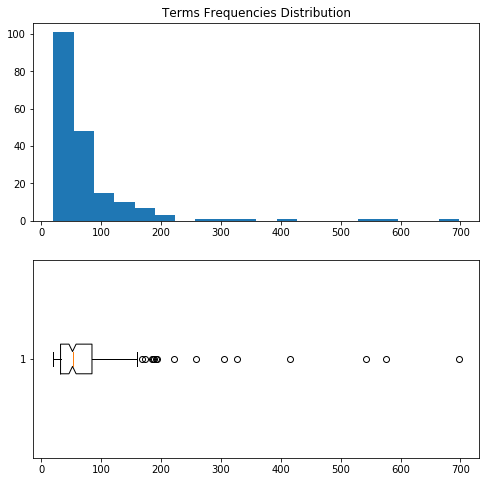

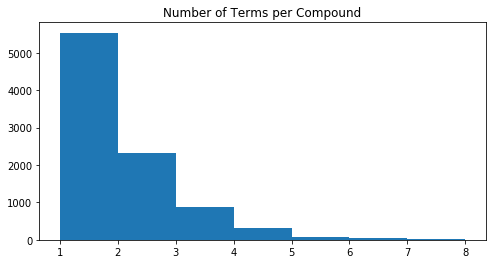

In [6]:
# "memberships" matrix: each row represents a term, the i-th is 1/0 if the i-th compound is/isn't associated with
# the term
m, term_labels = membershipMatrix(tset, terms)

# absolute frequency for each term (i.e. how many times the term is present in the dataset)
frequency = termsFrequency(m)
# number of terms associated with each compound
terms_per_cp = termPerCompound(m)

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.hist(frequency, bins=20)
plt.title("Terms Frequencies Distribution")
plt.subplot(2,1,2)
plt.boxplot(frequency, notch=True, vert=False)
plt.figure(figsize=(8, 4))
plt.hist(terms_per_cp, bins=7)
plt.title("Number of Terms per Compound")
plt.show()

In order to build our fingerprint mapper using as input just the SMILES representation of the molecules, it's interesting to find out how many different symbols are present in the SMILES strings (size of the vocabulary).

In [8]:
charset = set()
lengths = np.zeros((len(smiles), 1), dtype=int)
for i in range(len(smiles)):
    lengths[i] = len(smiles[i])
    smiles_set = set(list(smiles[i]))
    charset.update(smiles_set)

charset = list(charset)
charset.sort()
print('V = ', charset)
print('|V| = ', len(charset))

V =  ['#', '(', ')', '+', '-', '.', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'S', 'T', 'V', 'W', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'g', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'y']
|V| =  53


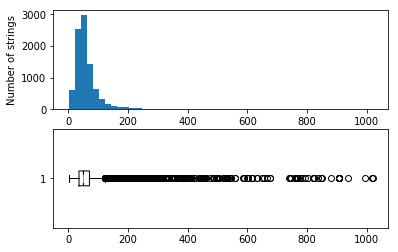

Min - Max - Average - Median SMILES length:  1 1021 65.8977545237 51.0


In [10]:
%matplotlib inline

plt.subplot(2,1,1)
plt.hist(lengths, bins=50)
plt.xlabel('Length of SMILES')
plt.ylabel('Number of strings')

plt.subplot(2,1,2)
plt.boxplot(lengths, notch=True, vert=False)
plt.show()

print('Min - Max - Average - Median SMILES length: ',lengths.min(), lengths.max(), lengths.mean(), np.median(lengths))